# Assessement: Data Science for Drug Discovery

#### Imports

In [1]:
# delete unused modules at the end
from __future__ import division

# CORE
import pandas as pd
import sys
from io import StringIO

# MATPLOTLIB
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib
%matplotlib inline

# NUMPY
import numpy as np
from numpy import linalg as LA
from numpy.linalg import eigvalsh,eigh

# RDKIT
from rdkit import Chem # rdkit contains a number of molecular descriptors
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole # needed to show molecules
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions # modifying defaults
from rdkit.Chem.Draw import IPythonConsole # needed to show molecules
DrawingOptions.bondLineWidth=1.8
from rdkit.Chem.rdmolops import GetAdjacencyMatrix
from rdkit.Chem.Crippen import MolLogP,MolMR

# SCIKIT LEARN
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.gaussian_process import GaussianProcessRegressor 
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_selection import SelectFromModel
## -------------------------------------------------
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

# MISCELLANEOUS
#import ES_ML_SOSSO.chemfun as cf
import seaborn as sns

Using matplotlib backend: <object object at 0x0000026B172372E0>


#### Data

In [2]:
# Import the data using pandas
data = pd.read_table("./COVID_moonshot_submissions-master/covid_submissions_all_info.csv"
                     , delimiter=',') # import dataset
data.shape # print shape

C:\Users\ronal\AppData\Local\Temp\ipykernel_35420\1849715330.py:2: DtypeWarning: Columns (3,6,7,9,10,11,12,13,14,15,18,19,27,28,29,30,31,32,33,34,35,36,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,66,67,69,70,71,72,73,74,75,76,84,85,86,87,89,90,91,92,93,94,95,96,104,105,106,107,109,110,111,112,113,114,115,116,124,125,126,127,129,130,131,132,133,134,135,136,144,145,146,147,149,150,151,152,153,154,155,156,164,165,166,167,169,170,171,172,173,174,175,176,184,185,186,187,189,190,191,192,193,194,195,196,204,205,206,207,209,210,211,212,213,214,215,216,224,225,226,227,229,230,231,232,233,234,235,236,244,245,246,247,249,253,254,255,256,257,258,259,275,276) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table("./COVID_moonshot_submissions-master/covid_submissions_all_info.csv"


(20997, 277)

In [3]:
# Don't limit the coolumns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)

In [4]:
data.head(2) # quick sanity check

,SMILES,CID,CID (canonical),CID (old format),Postera Link,InChIKey,creator,rationale,Submission Notes,fragments,Structure ID,Fragalysis Link,Enamine - REAL Space,Enamine - Extended REAL Space,Enamine - SCR,Enamine - BB,Mcule,Mcule Ultimate,In Molport or Mcule,In eMolecules,MW,cLogP,TPSA,Rotatable Bonds,Fraction sp3,HBA,HBD,Covalent Fragment,covalent_warhead,Acrylamide,Acrylamide Adduct,Chloroacetamide,Chloroacetamide Adduct,Vinylsulfonamide,Vinylsulfonamide Adduct,Nitrile,Nitrile Adduct,series,Order Date,Maker,Shipment Date,inspired_by,CDD_name,CDD_mol_ID,r_curve_IC50_x,r_max_inhibition_reading_x,r_min_inhibition_reading_x,r_hill_slope_x,r_R2_x,r_concentration_uM_x,r_inhibition_list_x,f_curve_IC50_x,f_max_inhibition_reading_x,f_min_inhibition_reading_x,f_hill_slope_x,f_R2_x,f_concentration_uM_x,f_inhibition_list_x,structure_ID_x,structure_LINK_x,ORDERED,MAKER,ORDER_DATE,MADE,SHIPMENT_DATE,ASSAYED,creator.1,rationale.1,fragments.1,covalent_warhead.1,r_curve_IC50_y,r_max_inhibition_reading_y,r_min_inhibition_reading_y,r_hill_slope_y,r_R2_y,r_concentration_uM_y,r_inhibition_list_y,f_curve_IC50_y,f_max_inhibition_reading_y,f_min_inhibition_reading_y,f_hill_slope_y,f_R2_y,f_concentration_uM_y,f_inhibition_list_y,structure_ID_y,structure_LINK_y,creator.1.1,rationale.1.1,fragments.1.1,covalent_warhead.1.1,r_curve_IC50_x.1,r_max_inhibition_reading_x.1,r_min_inhibition_reading_x.1,r_hill_slope_x.1,r_R2_x.1,r_concentration_uM_x.1,r_inhibition_list_x.1,f_curve_IC50_x.1,f_max_inhibition_reading_x.1,f_min_inhibition_reading_x.1,f_hill_slope_x.1,f_R2_x.1,f_concentration_uM_x.1,f_inhibition_list_x.1,structure_ID_x.1,structure_LINK_x.1,creator.1.1.1,rationale.1.1.1,fragments.1.1.1,covalent_warhead.1.1.1,r_curve_IC50_y.1,r_max_inhibition_reading_y.1,r_min_inhibition_reading_y.1,r_hill_slope_y.1,r_R2_y.1,r_concentration_uM_y.1,r_inhibition_list_y.1,f_curve_IC50_y.1,f_max_inhibition_reading_y.1,f_min_inhibition_reading_y.1,f_hill_slope_y.1,f_R2_y.1,f_concentration_uM_y.1,f_inhibition_list_y.1,structure_ID_y.1,structure_LINK_y.1,creator.1.1.1.1,rationale.1.1.1.1,fragments.1.1.1.1,covalent_warhead.1.1.1.1,r_curve_IC50_x.1.1,r_max_inhibition_reading_x.1.1,r_min_inhibition_reading_x.1.1,r_hill_slope_x.1.1,r_R2_x.1.1,r_concentration_uM_x.1.1,r_inhibition_list_x.1.1,f_curve_IC50_x.1.1,f_max_inhibition_reading_x.1.1,f_min_inhibition_reading_x.1.1,f_hill_slope_x.1.1,f_R2_x.1.1,f_concentration_uM_x.1.1,f_inhibition_list_x.1.1,structure_ID_x.1.1,structure_LINK_x.1.1,creator.1.1.1.1.1,rationale.1.1.1.1.1,fragments.1.1.1.1.1,covalent_warhead.1.1.1.1.1,r_curve_IC50_y.1.1,r_max_inhibition_reading_y.1.1,r_min_inhibition_reading_y.1.1,r_hill_slope_y.1.1,r_R2_y.1.1,r_concentration_uM_y.1.1,r_inhibition_list_y.1.1,f_curve_IC50_y.1.1,f_max_inhibition_reading_y.1.1,f_min_inhibition_reading_y.1.1,f_hill_slope_y.1.1,f_R2_y.1.1,f_concentration_uM_y.1.1,f_inhibition_list_y.1.1,structure_ID_y.1.1,structure_LINK_y.1.1,creator.1.1.1.1.1.1,rationale.1.1.1.1.1.1,fragments.1.1.1.1.1.1,covalent_warhead.1.1.1.1.1.1,r_curve_IC50_x.1.1.1,r_max_inhibition_reading_x.1.1.1,r_min_inhibition_reading_x.1.1.1,r_hill_slope_x.1.1.1,r_R2_x.1.1.1,r_concentration_uM_x.1.1.1,r_inhibition_list_x.1.1.1,f_curve_IC50_x.1.1.1,f_max_inhibition_reading_x.1.1.1,f_min_inhibition_reading_x.1.1.1,f_hill_slope_x.1.1.1,f_R2_x.1.1.1,f_concentration_uM_x.1.1.1,f_inhibition_list_x.1.1.1,structure_ID_x.1.1.1,structure_LINK_x.1.1.1,creator.1.1.1.1.1.1.1,rationale.1.1.1.1.1.1.1,fragments.1.1.1.1.1.1.1,covalent_warhead.1.1.1.1.1.1.1,r_curve_IC50_y.1.1.1,r_max_inhibition_reading_y.1.1.1,r_min_inhibition_reading_y.1.1.1,r_hill_slope_y.1.1.1,r_R2_y.1.1.1,r_concentration_uM_y.1.1.1,r_inhibition_list_y.1.1.1,f_curve_IC50_y.1.1.1,f_max_inhibition_reading_y.1.1.1,f_min_inhibition_reading_y.1.1.1,f_hill_slope_y.1.1.1,f_R2_y.1.1.1,f_concentration_uM_y.1.1.1,f_inhibition_list_y.1.1.1,structure_ID_y.1.1.1,structure_LINK_y.1.1.1,creator.1.1.1.1.1.1.1.1,rationale.1.1.1.1.1.1.1.1,fragments.1.1.1.1.1.1.1.1,covalent_warhead.1.

In [5]:
# Describe the data
#data.describe()
data.describe(include='all')

,SMILES,CID,CID (canonical),CID (old format),Postera Link,InChIKey,creator,rationale,Submission Notes,fragments,Structure ID,Fragalysis Link,Enamine - REAL Space,Enamine - Extended REAL Space,Enamine - SCR,Enamine - BB,Mcule,Mcule Ultimate,In Molport or Mcule,In eMolecules,MW,cLogP,TPSA,Rotatable Bonds,Fraction sp3,HBA,HBD,Covalent Fragment,covalent_warhead,Acrylamide,Acrylamide Adduct,Chloroacetamide,Chloroacetamide Adduct,Vinylsulfonamide,Vinylsulfonamide Adduct,Nitrile,Nitrile Adduct,series,Order Date,Maker,Shipment Date,inspired_by,CDD_name,CDD_mol_ID,r_curve_IC50_x,r_max_inhibition_reading_x,r_min_inhibition_reading_x,r_hill_slope_x,r_R2_x,r_concentration_uM_x,r_inhibition_list_x,f_curve_IC50_x,f_max_inhibition_reading_x,f_min_inhibition_reading_x,f_hill_slope_x,f_R2_x,f_concentration_uM_x,f_inhibition_list_x,structure_ID_x,structure_LINK_x,ORDERED,MAKER,ORDER_DATE,MADE,SHIPMENT_DATE,ASSAYED,creator.1,rationale.1,fragments.1,covalent_warhead.1,r_curve_IC50_y,r_max_inhibition_reading_y,r_min_inhibition_reading_y,r_hill_slope_y,r_R2_y,r_concentration_uM_y,r_inhibition_list_y,f_curve_IC50_y,f_max_inhibition_reading_y,f_min_inhibition_reading_y,f_hill_slope_y,f_R2_y,f_concentration_uM_y,f_inhibition_list_y,structure_ID_y,structure_LINK_y,creator.1.1,rationale.1.1,fragments.1.1,covalent_warhead.1.1,r_curve_IC50_x.1,r_max_inhibition_reading_x.1,r_min_inhibition_reading_x.1,r_hill_slope_x.1,r_R2_x.1,r_concentration_uM_x.1,r_inhibition_list_x.1,f_curve_IC50_x.1,f_max_inhibition_reading_x.1,f_min_inhibition_reading_x.1,f_hill_slope_x.1,f_R2_x.1,f_concentration_uM_x.1,f_inhibition_list_x.1,structure_ID_x.1,structure_LINK_x.1,creator.1.1.1,rationale.1.1.1,fragments.1.1.1,covalent_warhead.1.1.1,r_curve_IC50_y.1,r_max_inhibition_reading_y.1,r_min_inhibition_reading_y.1,r_hill_slope_y.1,r_R2_y.1,r_concentration_uM_y.1,r_inhibition_list_y.1,f_curve_IC50_y.1,f_max_inhibition_reading_y.1,f_min_inhibition_reading_y.1,f_hill_slope_y.1,f_R2_y.1,f_concentration_uM_y.1,f_inhibition_list_y.1,structure_ID_y.1,structure_LINK_y.1,creator.1.1.1.1,rationale.1.1.1.1,fragments.1.1.1.1,covalent_warhead.1.1.1.1,r_curve_IC50_x.1.1,r_max_inhibition_reading_x.1.1,r_min_inhibition_reading_x.1.1,r_hill_slope_x.1.1,r_R2_x.1.1,r_concentration_uM_x.1.1,r_inhibition_list_x.1.1,f_curve_IC50_x.1.1,f_max_inhibition_reading_x.1.1,f_min_inhibition_reading_x.1.1,f_hill_slope_x.1.1,f_R2_x.1.1,f_concentration_uM_x.1.1,f_inhibition_list_x.1.1,structure_ID_x.1.1,structure_LINK_x.1.1,creator.1.1.1.1.1,rationale.1.1.1.1.1,fragments.1.1.1.1.1,covalent_warhead.1.1.1.1.1,r_curve_IC50_y.1.1,r_max_inhibition_reading_y.1.1,r_min_inhibition_reading_y.1.1,r_hill_slope_y.1.1,r_R2_y.1.1,r_concentration_uM_y.1.1,r_inhibition_list_y.1.1,f_curve_IC50_y.1.1,f_max_inhibition_reading_y.1.1,f_min_inhibition_reading_y.1.1,f_hill_slope_y.1.1,f_R2_y.1.1,f_concentration_uM_y.1.1,f_inhibition_list_y.1.1,structure_ID_y.1.1,structure_LINK_y.1.1,creator.1.1.1.1.1.1,rationale.1.1.1.1.1.1,fragments.1.1.1.1.1.1,covalent_warhead.1.1.1.1.1.1,r_curve_IC50_x.1.1.1,r_max_inhibition_reading_x.1.1.1,r_min_inhibition_reading_x.1.1.1,r_hill_slope_x.1.1.1,r_R2_x.1.1.1,r_concentration_uM_x.1.1.1,r_inhibition_list_x.1.1.1,f_curve_IC50_x.1.1.1,f_max_inhibition_reading_x.1.1.1,f_min_inhibition_reading_x.1.1.1,f_hill_slope_x.1.1.1,f_R2_x.1.1.1,f_concentration_uM_x.1.1.1,f_inhibition_list_x.1.1.1,structure_ID_x.1.1.1,structure_LINK_x.1.1.1,creator.1.1.1.1.1.1.1,rationale.1.1.1.1.1.1.1,fragments.1.1.1.1.1.1.1,covalent_warhead.1.1.1.1.1.1.1,r_curve_IC50_y.1.1.1,r_max_inhibition_reading_y.1.1.1,r_min_inhibition_reading_y.1.1.1,r_hill_slope_y.1.1.1,r_R2_y.1.1.1,r_concentration_uM_y.1.1.1,r_inhibition_list_y.1.1.1,f_curve_IC50_y.1.1.1,f_max_inhibition_reading_y.1.1.1,f_min_inhibition_reading_y.1.1.1,f_hill_slope_y.1.1.1,f_R2_y.1.1.1,f_concentration_uM_y.1.1.1,f_inhibition_list_y.1.1.1,structure_ID_y.1.1.1,structure_LINK_y.1.1.1,creator.1.1.1.1.1.1.1.1,rationale.1.1.1.1.1.1.1.1,fragments.1.1.1.1.1.1.1.1,covalent_warhead.1.

In [6]:
data.shape

(20997, 277)

In [7]:
# Check for number of missing values in columns
data.isna().sum().sort_values(ascending=False)

fragments.1.1.1.1.1.1.1.1    20997
fragments.1.1.1.1            20997
fragments.1                  20997
fragments.2                  20997
r_inhibition_at_20_uM        20997
                             ...  
MADE                             0
ASSAYED                          0
Postera Link                     0
CID                              0
SMILES                           0
Length: 277, dtype: int64

In [8]:
data_slim = data[['SMILES','f_avg_IC50','r_avg_IC50','covalent_warhead',
                  'Covalent Fragment', 'Nitrile Adduct',
                  'Chloroacetamide Adduct',
                  'Vinylsulfonamide Adduct',
                  'Acrylamide Adduct']].copy()

data_slim.rename(columns={'Chloroacetamide Adduct':'Chloroacetamide_Adduct',
                           'Covalent Fragment':'Covalent_Fragment', 'Nitrile Adduct':'Nitrile_Adduct',
                             'Vinylsulfonamide Adduct':'Vinylsulfonamide_Adduct',
                               'Acrylamide Adduct':'Acrylamide_Adduct'}, inplace=True)

data_slim.head(35)

,SMILES,f_avg_IC50,r_avg_IC50,covalent_warhead,Covalent_Fragment,Nitrile_Adduct,Chloroacetamide_Adduct,Vinylsulfonamide_Adduct,Acrylamide_Adduct
0,N#Cc1ccccc1NC(=O)Cc1c[nH]c2ncccc12,NaN,NaN,True,True,False,False,False,False
1,N#Cc1ccccc1NC(=O)Cc1cccnc1,NaN,NaN,True,True,False,False,False,False
2,CCNc1ccc(C#N)c(NC(=O)Cc2c[nH]c3ncccc23)c1,NaN,NaN,True,True,False,False,False,False
3,CS(=O)(=O)Cc1ccc(C(=O)Nc2cccnc2)o1,NaN,NaN,False,True,False,False,False,False
4,O=C(Nc1cccnc1)c1ccc(N2CCC(O)CC2)o1,NaN,NaN,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
30,O=C(Nc1cccnc1)Nc1cccc(Cl)c1,NaN,NaN,False,False,False,False,False,False
31,O=C(Nc1cccnc1)Nc1cncc(Cl)c1,NaN,NaN,False,False,False,False,False,False
32,O=C(Cc1cncc(Cl)c1)Nc1cccnc1,NaN,NaN,False,False,False,False,False,False
33,N#Cc1cncc(CC(=O)Nc2cccnc2)c1,NaN,NaN,True,False,False,False,False,False


In [9]:
# Check for number of missing values in columns
data_slim.isna().sum().sort_values()

SMILES                         0
Chloroacetamide_Adduct        23
Vinylsulfonamide_Adduct       23
Acrylamide_Adduct             23
covalent_warhead            1751
Covalent_Fragment          13465
Nitrile_Adduct             16109
f_avg_IC50                 18737
r_avg_IC50                 20120
dtype: int64

#### Rough Cleaning

In [10]:
# Remove rows with missing values in f_avg_IC50
data_slim_fic50 = data_slim.copy().dropna(subset=['f_avg_IC50', 'covalent_warhead']).reset_index()

#### Encoding Molecules

In [11]:
def get_mol_from_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return mol

def mol_from_df(df, smiles_column):
    df['mol'] = df[smiles_column].copy().apply(get_mol_from_smiles)
    return df

data_mol = mol_from_df(data_slim_fic50, 'SMILES')

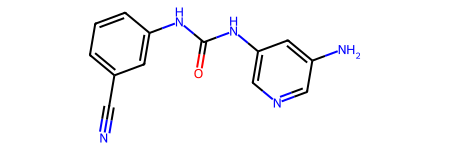

In [12]:
data_mol['mol'][0]

In [13]:
def get_fingerprint(mol, bits=1024, fp_radius=2):
    """
    Get the fingerprint from a molecule object
    """
    fpgen = AllChem.GetMorganGenerator(radius=fp_radius, fpSize=bits)
    #fp = AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=1024)
    return np.array(fpgen.GetFingerprint(mol))

def fingerprint_from_df(df, mol_column='mol'):
    """
    Get the fingerprint from a pandas dataframe column.
    """
    df['fp'] = df[mol_column].copy().apply(get_fingerprint)
    return df

In [14]:
# Testing the fingerprint function
fp_test = get_fingerprint(data_mol['mol'][0])
len(fp_test)

1024

In [15]:
# Apply the fingerprint function to the dataframe
data_fp = fingerprint_from_df(data_mol)
data_fp.head(1)

,index,SMILES,f_avg_IC50,r_avg_IC50,covalent_warhead,Covalent_Fragment,Nitrile_Adduct,Chloroacetamide_Adduct,Vinylsulfonamide_Adduct,Acrylamide_Adduct,mol,fp
0,24,N#Cc1cccc(NC(=O)Nc2cncc(N)c2)c1,54.272964,NaN,True,False,False,False,False,False,<rdkit.Chem.rdchem.Mol object at 0x0000026B1F3...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


#### Expanding the fingerprint

##### Format other data

In [16]:
# Convert True/False to 1/0 for covalent_warhead
data_fp['covalent_warhead_1h'] = np.array(data_fp['covalent_warhead']).astype(int)
#data_fp.head(1)

##### Add new features

In [17]:
desc_names = ['HeavyAtomCount', 'TPSA', 'NumHAcceptors',
              'NumHDonors', 'NumHeteroatoms', 'PEOE_VSA10',
              'VSA_EState3', 'NOCount', 'MolLogP', 'NHOHCount']

def add_descriptor(mol, descriptor):
    """
    Add a descriptor to a molecule object.
    """
    return Descriptors.CalcMolDescriptors(mol)[descriptor]

def add_descriptor_to_df(df, descriptor, mol_column='mol'):
    """
    Add a descriptor to a dataframe row by row.
    """
    df[descriptor] = df[mol_column].copy().apply(add_descriptor, args=(descriptor,))
    return df


### Trying to optimize the operation for multiple descriptors
def add_descriptors(mol, descriptors):
    """
    Add a descriptor to a molecule object.
    """
    vals = Descriptors.CalcMolDescriptors(mol)
    
    #mol.SetProp(descriptor, str(function(mol)))
    return [vals[descriptor] for descriptor in descriptors]

def add_descriptors_to_df(df, descriptors, mol_column='mol'):
    """
    Add grouped descriptors to a dataframe row by row.
    """
    df['descriptors'] = df[mol_column].copy().apply(add_descriptor, args=(descriptors,))
    return df



#add_descriptor(data_fp['mol'][0], 'NumHAcceptors')

df = add_descriptor_to_df(data_fp, 'NumHDonors')
df = add_descriptor_to_df(df, 'NumHAcceptors')
df = add_descriptor_to_df(df, 'NumHeteroatoms')
df = add_descriptor_to_df(df, 'HeavyAtomCount')
df.head(1)

,index,SMILES,f_avg_IC50,r_avg_IC50,covalent_warhead,Covalent_Fragment,Nitrile_Adduct,Chloroacetamide_Adduct,Vinylsulfonamide_Adduct,Acrylamide_Adduct,mol,fp,covalent_warhead_1h,NumHDonors,NumHAcceptors,NumHeteroatoms,HeavyAtomCount
0,24,N#Cc1cccc(NC(=O)Nc2cncc(N)c2)c1,54.272964,NaN,True,False,False,False,False,False,<rdkit.Chem.rdchem.Mol object at 0x0000026B1F3...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,3,4,6,19


##### Adding continuous features

##### Processing continuous features

In [ ]:
# Robustly bin continuous data
# MW, LogP, TPSA

In [34]:
# Get counts of all values of a descriptor
#df_test.NumHDonors.value_counts().sort_values(ascending=False).head(20)

# Get counts of all values of a descriptor
def onehot_encode_multi_cat(df_e, column, lbl_tag, max_cats=20):
    """
    Onehot encode a column with multiple categories.
    """
    top = [x for x in df_e[column].value_counts().sort_values(ascending=False).head(max_cats).index]
    print(top)
    df2 = df_e.copy()
    for label in top:
        df2[f'{label}_{lbl_tag}'] = np.where(df2[column]==label, 1, 0)

    try:
        be_cols = [f'{top[x]}_{lbl_tag}' for x in range(len(top))] # list of new column names
        print(be_cols)
    except:
        be_cols = []

    return df2, be_cols


df_encoded, nhdr = onehot_encode_multi_cat(df, 'NumHDonors', 'nhdr') # usage example
df_encoded, nha = onehot_encode_multi_cat(df_encoded, 'NumHAcceptors', 'nha')
df_encoded, nhe = onehot_encode_multi_cat(df_encoded, 'NumHeteroatoms', 'nhe')
df_encoded, hac = onehot_encode_multi_cat(df_encoded, 'HeavyAtomCount', 'hac')
df_encoded[['NumHDonors']+nhdr+['NumHAcceptors']+nha+['NumHeteroatoms']+nhe+['HeavyAtomCount']+hac].head(1)

[1, 2, 0, 3, 4, 5]
['1_nhdr', '2_nhdr', '0_nhdr', '3_nhdr', '4_nhdr', '5_nhdr']
[4, 3, 5, 6, 2, 7, 8, 9, 1, 10, 13]
['4_nha', '3_nha', '5_nha', '6_nha', '2_nha', '7_nha', '8_nha', '9_nha', '1_nha', '10_nha', '13_nha']
[6, 7, 5, 8, 9, 10, 4, 11, 12, 3, 13, 15, 14]
['6_nhe', '7_nhe', '5_nhe', '8_nhe', '9_nhe', '10_nhe', '4_nhe', '11_nhe', '12_nhe', '3_nhe', '13_nhe', '15_nhe', '14_nhe']
[25, 24, 27, 22, 21, 26, 23, 20, 28, 37, 29, 32, 34, 39, 38, 36, 30, 31, 33, 35]
['25_hac', '24_hac', '27_hac', '22_hac', '21_hac', '26_hac', '23_hac', '20_hac', '28_hac', '37_hac', '29_hac', '32_hac', '34_hac', '39_hac', '38_hac', '36_hac', '30_hac', '31_hac', '33_hac', '35_hac']


,NumHDonors,1_nhdr,2_nhdr,0_nhdr,3_nhdr,4_nhdr,5_nhdr,NumHAcceptors,4_nha,3_nha,5_nha,6_nha,2_nha,7_nha,8_nha,9_nha,1_nha,10_nha,13_nha,NumHeteroatoms,6_nhe,7_nhe,5_nhe,8_nhe,9_nhe,10_nhe,4_nhe,11_nhe,12_nhe,3_nhe,13_nhe,15_nhe,14_nhe,HeavyAtomCount,25_hac,24_hac,27_hac,22_hac,21_hac,26_hac,23_hac,20_hac,28_hac,37_hac,29_hac,32_hac,34_hac,39_hac,38_hac,36_hac,30_hac,31_hac,33_hac,35_hac
0,3,0,0,0,1,0,0,4,1,0,0,0,0,0,0,0,0,0,0,6,1,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
df_encoded.head(1)

,index,SMILES,f_avg_IC50,r_avg_IC50,covalent_warhead,Covalent_Fragment,Nitrile_Adduct,Chloroacetamide_Adduct,Vinylsulfonamide_Adduct,Acrylamide_Adduct,mol,fp,covalent_warhead_1h,NumHDonors,NumHAcceptors,NumHeteroatoms,HeavyAtomCount,1_nhdr,2_nhdr,0_nhdr,3_nhdr,4_nhdr,5_nhdr,4_nha,3_nha,5_nha,6_nha,2_nha,7_nha,8_nha,9_nha,1_nha,10_nha,13_nha,6_nhe,7_nhe,5_nhe,8_nhe,9_nhe,10_nhe,4_nhe,11_nhe,12_nhe,3_nhe,13_nhe,15_nhe,14_nhe,25_hac,24_hac,27_hac,22_hac,21_hac,26_hac,23_hac,20_hac,28_hac,37_hac,29_hac,32_hac,34_hac,39_hac,38_hac,36_hac,30_hac,31_hac,33_hac,35_hac
0,24,N#Cc1cccc(NC(=O)Nc2cncc(N)c2)c1,54.272964,NaN,True,False,False,False,False,False,<rdkit.Chem.rdchem.Mol object at 0x0000026B1F3...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,3,4,6,19,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Merge fingerprint data

In [36]:
# Extend the fingerprint with descriptors
fp_val_cols = ['covalent_warhead_1h'] + nhdr + nha + nhe + hac # define columns to merge
df_encoded['fp_c'] = df_encoded.apply(lambda row: np.append(row['fp'], [row[col] for col in fp_val_cols]), axis=1)
df_encoded.head(1)

,index,SMILES,f_avg_IC50,r_avg_IC50,covalent_warhead,Covalent_Fragment,Nitrile_Adduct,Chloroacetamide_Adduct,Vinylsulfonamide_Adduct,Acrylamide_Adduct,mol,fp,covalent_warhead_1h,NumHDonors,NumHAcceptors,NumHeteroatoms,HeavyAtomCount,1_nhdr,2_nhdr,0_nhdr,3_nhdr,4_nhdr,5_nhdr,4_nha,3_nha,5_nha,6_nha,2_nha,7_nha,8_nha,9_nha,1_nha,10_nha,13_nha,6_nhe,7_nhe,5_nhe,8_nhe,9_nhe,10_nhe,4_nhe,11_nhe,12_nhe,3_nhe,13_nhe,15_nhe,14_nhe,25_hac,24_hac,27_hac,22_hac,21_hac,26_hac,23_hac,20_hac,28_hac,37_hac,29_hac,32_hac,34_hac,39_hac,38_hac,36_hac,30_hac,31_hac,33_hac,35_hac,fp_c
0,24,N#Cc1cccc(NC(=O)Nc2cncc(N)c2)c1,54.272964,NaN,True,False,False,False,False,False,<rdkit.Chem.rdchem.Mol object at 0x0000026B1F3...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,3,4,6,19,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [37]:
df_encoded['fp_c'][0].shape

(1075,)

#### Dealing with inconsistent IC50 values

In [38]:
data_nm = df_encoded[df_encoded.f_avg_IC50 <= 99.5] # no max IC50 values
data_nm.shape

(1853, 68)

#### Splitting Data

In [39]:
# Create a dataframe with the fingerprints
fp=data_nm['fp_c'].values.tolist()
ic50=data_nm['f_avg_IC50'].values
ic50=np.log10(ic50*1000)
ic50[:100]

array([4.73458354, 4.80314921, 4.42682857, 4.76035022, 4.99567906,
       3.62555318, 4.39060298, 4.80961905, 4.41829743, 4.20589587,
       4.78799882, 4.73991122, 4.99567906, 3.48524883, 3.82506376,
       4.02376073, 4.27652589, 4.23957048, 4.38353739, 4.59182987,
       4.99782308, 2.89431944, 3.33583636, 3.96516893, 3.068961  ,
       3.30192471, 3.55319965, 4.44022626, 4.89463706, 4.99576678,
       4.44628596, 2.66815272, 4.99563519, 4.55253054, 3.50736803,
       3.66334335, 3.43856841, 3.50736803, 4.33773436, 3.63852056,
       4.30686927, 4.16804797, 4.60406866, 3.27633179, 3.50736803,
       3.57922678, 4.08326027, 4.29092602, 3.2956523 , 4.25947962,
       4.5255764 , 4.15279224, 3.43409293, 4.57295353, 4.99782308,
       4.99782308, 4.99782308, 4.99782308, 4.99782308, 3.27305167,
       3.89613225, 3.92768329, 4.43972567, 4.99567906, 4.82218528,
       4.99563519, 4.66273471, 4.77206504, 4.99028927, 4.72834619,
       3.88836564, 3.42152246, 4.47355153, 2.73447769, 3.76055

In [40]:
ic50.max()

4.997823080745725

In [41]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(fp, ic50, test_size=0.3, random_state=42)

#### Training an MLPregressor

In [42]:
regr = MLPRegressor(random_state=1, max_iter=500,
                    hidden_layer_sizes=(600, 400, 200),
                    alpha=1e-5)
regr.fit(X_train, y_train)

MLPRegressor(alpha=1e-05, hidden_layer_sizes=(600, 400, 200), max_iter=500,
             random_state=1)

In [43]:
test = regr.predict(X_test)
#test
r2_score(y_test, test)

0.5893466141255643

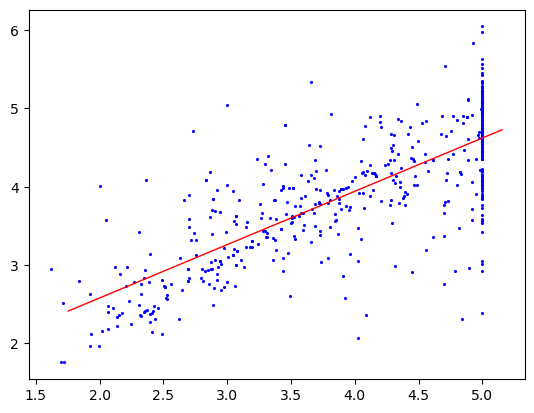

In [55]:
plt.scatter(y_test, test, color='b', s=1.5)
m, c = np.polyfit(y_test, test, 1)
y = np.arange(min(test), np.max(test)-0.8, 0.1)
plt.plot(y, m*y+c, color='r', linewidth=1)